In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=500, centers=3)

<AxesSubplot:>

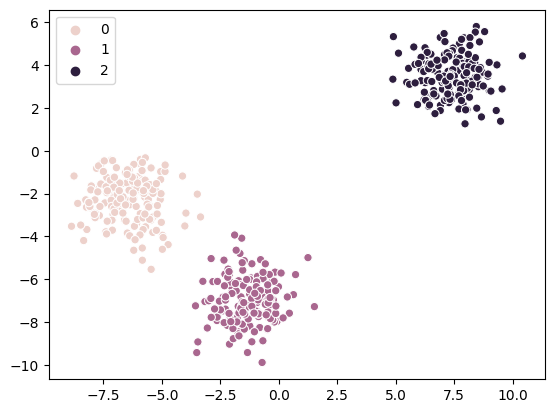

In [4]:
sns.scatterplot(x=dataset[0][:,0], y=dataset[0][:,1],hue=dataset[1], marker='o')

In [5]:
bandwidth = estimate_bandwidth(dataset[0], quantile=0.2, n_samples=500)
clustering = MeanShift(bandwidth=bandwidth).fit(dataset[0])

In [6]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


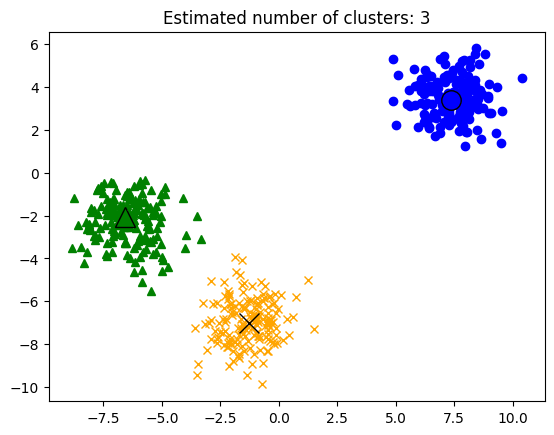

In [7]:
plt.figure(1)
plt.clf()

colors = ["orange", "blue", "green", "red"]
markers = ["x", "o", "^", "*"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(dataset[0][my_members, 0], dataset[0][my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [8]:
from pyhull.convex_hull import ConvexHull

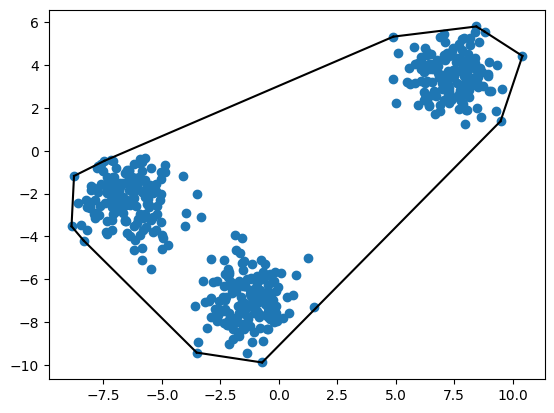

In [9]:
hull = ConvexHull(dataset[0])
plt.plot(dataset[0][:,0], dataset[0][:,1], 'o')
for simplex in hull.simplices:
        plt.plot(simplex.coords[:,0], simplex.coords[:,1], 'k-')

In [10]:
hulls = [ConvexHull(dataset[0][labels == i]) for i in range(n_clusters_)]

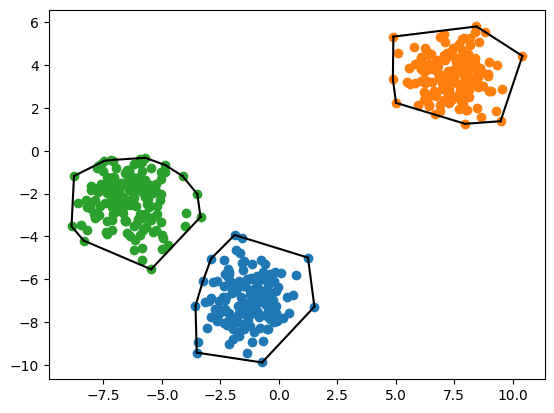

In [11]:
for i,hull in enumerate(hulls):
    subset = dataset[0][labels == i]
    plt.plot(subset[:,0], subset[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(simplex.coords[:,0], simplex.coords[:,1], 'k-')

In [12]:
## call the ellipse stuff

import sys
sys.path.append("../ellipseCode/")
from cmaesExMultipleEllipse import *


delta = 0.05
Q_matrices,ellipse_centers = callCMAESMatrixManyEllipse(dataset[0],delta,n_clusters_,ellipse_centers=cluster_centers)

Q_matrices = np.array(Q_matrices)
ellipse_centers = np.array(ellipse_centers)

D_cp = computeCPEllipseMatrixManyEllipse(dataset[0],Q_matrices,ellipse_centers,delta)
print("D_cp: " + str(D_cp))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(4,)
(4,)
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(4,)
(4,)
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
(4,)
(4,)
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=911714, Fri Sep 15 14:24:08 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 4.004548156943251e+01 1.0e+00 9.44e-01  9e-01  1e+00 0:00.2
    2     22 4.578143050085875e+01 1.2e+00 9.24e-01  9e-01  1e+00 0:00.3
    3     33 4.510438138003496e+01 1.2e+00 9.81e-01  9e-01  1e+00 0:00.5
   34    374 1.954175750327903e+01 2.5e+00 4.89e-01  4e-01  5e-01 0:03.5
   77    847 1.847737199810610e+01 6.2e+00 1.54e-01  1e-01  2e-01 0:07.5
  100   1100 1.827479843717285e+01 7.8e+00 4.90e-02  4e-02  5e-02 0:09.6
  168   1848 1.820190658739553e+01 1.5e+01 3.15e-03  2e-03  4e-03 0:15.6
  200   2200 1.819925493675817e+01 2.1e+01 1.44e-03  1e-03  2e-03 0:18.9
  280   3080 1.819784775082930e+01 5.3e+01 6.37e-05  4e-05  1e-0

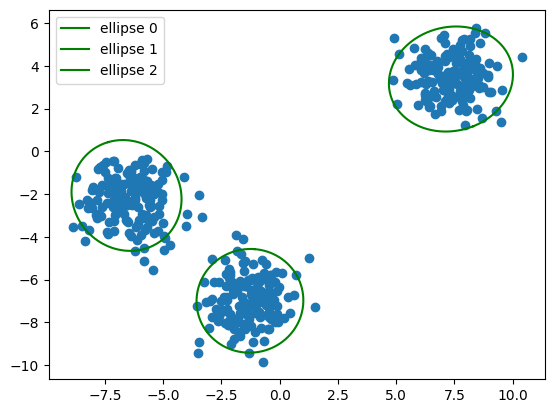

In [13]:
plt.clf()
plt.plot(dataset[0][:,0], dataset[0][:,1], 'o')
for i in range(n_clusters_):
    plot_ellipse(ellipse_centers[i],Q_matrices[i],D_cp,'green','ellipse ' + str(i))
plt.legend()





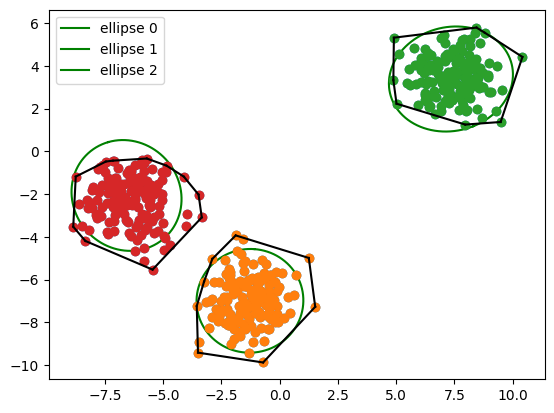

In [14]:
## generated entirely by github autopilot

plt.clf()
plt.plot(dataset[0][:,0], dataset[0][:,1], 'o')
for i in range(n_clusters_):
    plot_ellipse(ellipse_centers[i],Q_matrices[i],D_cp,'green','ellipse ' + str(i))
    subset = dataset[0][labels == i]
    plt.plot(subset[:,0], subset[:,1], 'o')
    for simplex in hulls[i].simplices:
        plt.plot(simplex.coords[:,0], simplex.coords[:,1], 'k-')
plt.legend()
